A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
cloth = pd.read_csv('Company_Data.csv')
cloth

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
cloth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
cloth = pd.get_dummies(cloth, columns=["ShelveLoc", "Urban", "US"], drop_first=True)

In [5]:
cloth["Sale"] = pd.cut(cloth["Sales"], bins=[-float("inf"), 7.5, float("inf")], labels=["Low", "High"])

In [6]:
cloth.drop(["Sales"], axis=1)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Sale
0,138,73,11,276,120,42,17,0,0,1,1,High
1,111,48,16,260,83,65,10,1,0,1,1,High
2,113,35,10,269,80,59,12,0,1,1,1,High
3,117,100,4,466,97,55,14,0,1,1,1,Low
4,141,64,3,340,128,38,13,0,0,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,0,1,1,High
396,139,23,3,37,120,55,11,0,1,0,1,Low
397,162,26,12,368,159,40,18,0,1,1,1,Low
398,100,79,7,284,95,50,12,0,0,1,1,Low


In [7]:
X = cloth.iloc[:,[0,9]].values
y = cloth.iloc[:,-1].values

In [8]:
X

array([[ 9.5 ,  0.  ],
       [11.22,  0.  ],
       [10.06,  1.  ],
       [ 7.4 ,  1.  ],
       [ 4.15,  0.  ],
       [10.81,  0.  ],
       [ 6.63,  1.  ],
       [11.85,  0.  ],
       [ 6.54,  1.  ],
       [ 4.69,  1.  ],
       [ 9.01,  0.  ],
       [11.96,  0.  ],
       [ 3.98,  1.  ],
       [10.96,  0.  ],
       [11.17,  0.  ],
       [ 8.71,  1.  ],
       [ 7.58,  0.  ],
       [12.29,  0.  ],
       [13.91,  0.  ],
       [ 8.73,  1.  ],
       [ 6.41,  1.  ],
       [12.13,  0.  ],
       [ 5.08,  1.  ],
       [ 5.87,  1.  ],
       [10.14,  0.  ],
       [14.9 ,  0.  ],
       [ 8.33,  0.  ],
       [ 5.27,  1.  ],
       [ 2.99,  0.  ],
       [ 7.81,  0.  ],
       [13.55,  0.  ],
       [ 8.25,  1.  ],
       [ 6.2 ,  0.  ],
       [ 8.77,  0.  ],
       [ 2.67,  1.  ],
       [11.07,  1.  ],
       [ 8.89,  0.  ],
       [ 4.95,  1.  ],
       [ 6.59,  1.  ],
       [ 3.24,  0.  ],
       [ 2.07,  0.  ],
       [ 7.96,  0.  ],
       [10.43,  1.  ],
       [ 4.

In [9]:
y

['High', 'High', 'High', 'Low', 'Low', ..., 'High', 'Low', 'Low', 'Low', 'High']
Length: 400
Categories (2, object): ['Low' < 'High']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
X_train

array([[ 9.16,  0.  ],
       [ 8.47,  1.  ],
       [ 6.8 ,  0.  ],
       [ 9.32,  0.  ],
       [ 5.36,  1.  ],
       [ 7.5 ,  0.  ],
       [ 7.52,  0.  ],
       [ 9.32,  1.  ],
       [ 5.93,  1.  ],
       [ 4.21,  1.  ],
       [ 9.48,  0.  ],
       [ 7.95,  1.  ],
       [ 8.21,  0.  ],
       [12.13,  0.  ],
       [ 6.53,  1.  ],
       [ 5.73,  1.  ],
       [ 5.12,  0.  ],
       [10.61,  0.  ],
       [ 7.36,  0.  ],
       [ 5.99,  0.  ],
       [ 4.53,  1.  ],
       [ 3.45,  1.  ],
       [ 9.43,  0.  ],
       [13.14,  0.  ],
       [ 6.81,  1.  ],
       [ 7.44,  1.  ],
       [ 5.08,  1.  ],
       [ 8.31,  1.  ],
       [ 8.64,  1.  ],
       [ 7.3 ,  1.  ],
       [10.49,  0.  ],
       [ 5.57,  1.  ],
       [ 8.85,  1.  ],
       [10.31,  1.  ],
       [ 9.7 ,  1.  ],
       [ 6.2 ,  1.  ],
       [ 6.15,  0.  ],
       [ 7.23,  1.  ],
       [ 4.69,  1.  ],
       [12.29,  0.  ],
       [ 8.22,  1.  ],
       [ 8.68,  1.  ],
       [13.55,  0.  ],
       [ 9.

In [12]:
X_test

array([[ 9.54,  0.  ],
       [11.18,  0.  ],
       [ 7.38,  1.  ],
       [ 4.1 ,  0.  ],
       [ 6.9 ,  0.  ],
       [ 8.32,  0.  ],
       [ 7.71,  1.  ],
       [ 5.71,  1.  ],
       [ 6.53,  0.  ],
       [ 4.83,  1.  ],
       [ 4.95,  1.  ],
       [ 3.67,  1.  ],
       [ 6.01,  0.  ],
       [12.57,  0.  ],
       [ 3.98,  1.  ],
       [ 5.21,  1.  ],
       [11.28,  0.  ],
       [ 6.03,  1.  ],
       [ 4.97,  1.  ],
       [ 6.42,  1.  ],
       [ 5.61,  1.  ],
       [ 6.53,  1.  ],
       [ 8.87,  0.  ],
       [ 8.43,  0.  ],
       [ 7.54,  1.  ],
       [ 9.33,  1.  ],
       [ 4.43,  1.  ],
       [ 8.71,  1.  ],
       [ 7.53,  1.  ],
       [ 5.3 ,  1.  ],
       [ 8.01,  1.  ],
       [10.01,  1.  ],
       [ 7.63,  0.  ],
       [ 6.68,  0.  ],
       [ 4.9 ,  1.  ],
       [10.64,  1.  ],
       [ 5.33,  1.  ],
       [ 6.38,  1.  ],
       [ 7.78,  1.  ],
       [ 9.71,  0.  ],
       [ 4.11,  1.  ],
       [ 9.16,  0.  ],
       [ 6.63,  1.  ],
       [11.

In [13]:
y_train

['High', 'High', 'Low', 'High', 'Low', ..., 'High', 'High', 'High', 'Low', 'High']
Length: 300
Categories (2, object): ['Low' < 'High']

In [14]:
y_test

['High', 'High', 'Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low', 'Low', 'High']
Length: 100
Categories (2, object): ['Low' < 'High']

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [16]:
X_train

array([[ 6.18745430e-01, -1.09077084e+00],
       [ 3.76796880e-01,  9.16782852e-01],
       [-2.08788742e-01, -1.09077084e+00],
       [ 6.74849442e-01, -1.09077084e+00],
       [-7.13724847e-01,  9.16782852e-01],
       [ 3.66663093e-02, -1.09077084e+00],
       [ 4.36793108e-02, -1.09077084e+00],
       [ 6.74849442e-01,  9.16782852e-01],
       [-5.13854305e-01,  9.16782852e-01],
       [-1.11697243e+00,  9.16782852e-01],
       [ 7.30953454e-01, -1.09077084e+00],
       [ 1.94458842e-01,  9.16782852e-01],
       [ 2.85627861e-01, -1.09077084e+00],
       [ 1.66017615e+00, -1.09077084e+00],
       [-3.03464261e-01,  9.16782852e-01],
       [-5.83984320e-01,  9.16782852e-01],
       [-7.97880864e-01, -1.09077084e+00],
       [ 1.12718804e+00, -1.09077084e+00],
       [-1.24247009e-02, -1.09077084e+00],
       [-4.92815301e-01, -1.09077084e+00],
       [-1.00476441e+00,  9.16782852e-01],
       [-1.38346649e+00,  9.16782852e-01],
       [ 7.13420950e-01, -1.09077084e+00],
       [ 2.

In [17]:
X_test

array([[ 6.44305890e-01, -1.12815215e+00],
       [ 1.25123390e+00, -1.12815215e+00],
       [-1.55062704e-01,  8.86405260e-01],
       [-1.36891872e+00, -1.12815215e+00],
       [-3.32700170e-01, -1.12815215e+00],
       [ 1.92810666e-01, -1.12815215e+00],
       [-3.29369467e-02,  8.86405260e-01],
       [-7.73093053e-01,  8.86405260e-01],
       [-4.69629049e-01, -1.12815215e+00],
       [-1.09876174e+00,  8.86405260e-01],
       [-1.05435237e+00,  8.86405260e-01],
       [-1.52805228e+00,  8.86405260e-01],
       [-6.62069637e-01, -1.12815215e+00],
       [ 1.76564239e+00, -1.12815215e+00],
       [-1.41332808e+00,  8.86405260e-01],
       [-9.58132079e-01,  8.86405260e-01],
       [ 1.28824170e+00, -1.12815215e+00],
       [-6.54668076e-01,  8.86405260e-01],
       [-1.04695081e+00,  8.86405260e-01],
       [-5.10337635e-01,  8.86405260e-01],
       [-8.10100858e-01,  8.86405260e-01],
       [-4.69629049e-01,  8.86405260e-01],
       [ 3.96353595e-01, -1.12815215e+00],
       [ 2.

In [18]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
y_pred

array(['High', 'High', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low',
       'High', 'Low', 'Low', 'High', 'High', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'High', 'Low', 'High', 'High', 'Low', 'High', 'High',
       'High', 'Low', 'High', 'High', 'High', 'High', 'Low', 'Low',
       'High', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'Low', 'High',
       'High', 'Low', 'High', 'Low', 'High', 'High', 'High', 'High',
       'High', 'High', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
       'Low', 'High', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'High'], dtype=object)

In [21]:
y_test

['High', 'High', 'Low', 'Low', 'Low', ..., 'Low', 'Low', 'Low', 'Low', 'High']
Length: 100
Categories (2, object): ['Low' < 'High']

In [22]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix: ",cm)
print("Accuracy: ",acc)

Confusion Matrix:  [[46  8]
 [ 0 46]]
Accuracy:  0.92


[Text(0.5, 0.75, 'X[0] <= 0.04\nentropy = 0.999\nsamples = 300\nvalue = [144, 156]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 156\nvalue = [0, 156]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 144\nvalue = [144, 0]')]

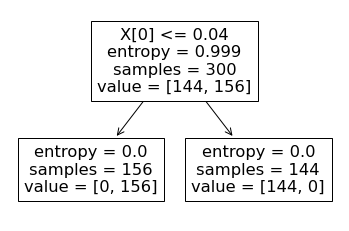

In [23]:
plot_tree(classifier)

# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [24]:
fc = pd.read_csv('Fraud_check.csv')
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [25]:
fc.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [26]:
fc.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [28]:
fc['Risk'] = 'Good'
fc.loc[fc['Taxable.Income'] <= 30000, 'Risk'] = 'Risky'
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [29]:
fc = fc.drop(columns=["Taxable.Income"])

In [30]:
fc = pd.get_dummies(fc, columns=["Undergrad", "Marital.Status", "Urban"], drop_first=True)

In [31]:
X = fc.drop(columns=["Risk"])
y = fc["Risk"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
145,197422,2,0,0,0,1
9,155482,4,1,0,0,1
375,130935,2,0,1,0,0
523,42198,12,0,0,0,0
188,137569,10,0,0,0,0
...,...,...,...,...,...,...
71,105680,22,0,0,1,0
106,58535,20,1,0,1,1
270,130680,5,0,1,0,0
435,111774,4,0,0,0,1


In [34]:
X_test

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
110,32450,19,0,0,1,1
419,138074,20,0,1,0,0
565,31064,28,0,0,0,0
77,118344,26,1,1,0,0
181,36116,20,0,0,0,0
...,...,...,...,...,...,...
399,74497,21,0,0,1,0
340,54437,21,1,1,0,1
148,197038,21,0,1,0,0
494,197045,13,0,0,1,1


In [35]:
y_train

145     Good
9       Good
375     Good
523     Good
188    Risky
       ...  
71      Good
106    Risky
270     Good
435     Good
102     Good
Name: Risk, Length: 480, dtype: object

In [36]:
y_test

110    Risky
419     Good
565     Good
77      Good
181    Risky
       ...  
399     Good
340     Good
148     Good
494     Good
439    Risky
Name: Risk, Length: 120, dtype: object

In [37]:
dt = DecisionTreeClassifier(random_state=0)

In [38]:
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [39]:
y_pred

array(['Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.78      0.79      0.78        94
       Risky       0.20      0.19      0.20        26

    accuracy                           0.66       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.65      0.66      0.66       120



In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=0)
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print("Best parameters: ", grid_dt.best_params_)
print("Best score: ", grid_dt.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score:  0.7770833333333333
